In [1]:
import pywt
import os
import pandas as pd
import librosa
import librosa.display
import glob 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
from fitter import Fitter, get_common_distributions, get_distributions
from playsound import playsound
import IPython.display
from scipy import signal
import random

from sklearn.preprocessing import StandardScaler
import sklearn

from utils import plot_projections

from scipy.stats import kurtosis, skew

%matplotlib widget

playsound is relying on another python subprocess. Please use `pip install pygobject` if you want playsound to run more efficiently.


In [2]:
laser_dir = '/home/hashim/PHD/audio_data/Just_Laser/'
laser_files = list(glob.glob(os.path.join(laser_dir, '*.mp3')))
laser_files.sort()
# print(laser_files)
print(len(laser_files))

10


In [3]:
Silence_dir = '/home/hashim/PHD/audio_data/Silence/'
Silence_files = list(glob.glob(os.path.join(Silence_dir, '*.mp3')))
Silence_files.sort()
print(Silence_files)
print(len(Silence_files))

['/home/hashim/PHD/audio_data/Silence/silence1_output_channel1.mp3', '/home/hashim/PHD/audio_data/Silence/silence1_output_channel2.mp3', '/home/hashim/PHD/audio_data/Silence/silence2_output_channel1.mp3', '/home/hashim/PHD/audio_data/Silence/silence2_output_channel2.mp3']
4


In [4]:
laser_audio = laser_files[3]
silence_audio = Silence_files[2]

In [6]:
sil_audio_data, sr = librosa.load(silence_audio, res_type='kaiser_fast', offset=1, duration=2)
sil_audio_data = librosa.util.normalize(sil_audio_data)

In [7]:
IPython.display.Audio(data=sil_audio_data, rate=sr)

In [8]:
laser_audio_data, sr = librosa.load(laser_audio, res_type='kaiser_fast', offset=1, duration=2)
laser_audio_data = librosa.util.normalize(laser_audio_data)

In [9]:
IPython.display.Audio(data=laser_audio_data, rate=sr)

In [10]:
f, Pxx_sil = signal.periodogram(sil_audio_data, sr)
A_rms_sil = np.sqrt(Pxx_sil)

In [11]:
f, Pxx_laser = signal.periodogram(laser_audio_data, sr)
A_rms_laser = np.sqrt(Pxx_laser)

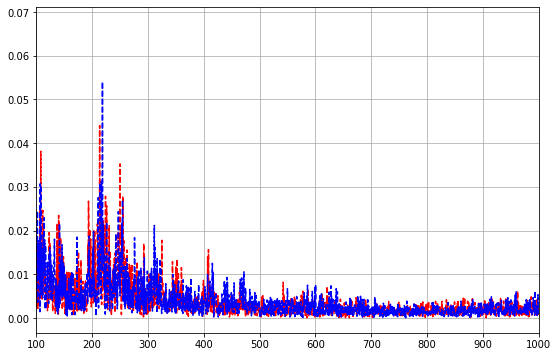

In [12]:
%matplotlib inline
plt.figure(figsize=(9, 6))
plt.plot(f, A_rms_laser, 'r--')
plt.plot(f, A_rms_sil, 'b--')
plt.xlim(100, 1000)
# plt.ylim(0, 1)
plt.grid(True)
plt.show()

In [16]:
file_number = 1

def plot_freq_amp(file_number, max_freq=1500, save_fig=False):
    laser_audio = laser_files[file_number]
    original_audio = Silence_files[file_number]

    orig_audio_data, sr = librosa.load(original_audio, res_type='kaiser_fast', offset=1, duration=2)
    orig_audio_data = librosa.util.normalize(orig_audio_data)

    laser_audio_data, sr = librosa.load(laser_audio, res_type='kaiser_fast', offset=1, duration=2)
    laser_audio_data = librosa.util.normalize(laser_audio_data)

    f, Pxx_orig = signal.periodogram(orig_audio_data, sr)
    A_rms_orig = np.sqrt(Pxx_orig)

    f, Pxx_laser = signal.periodogram(laser_audio_data, sr)
    A_rms_laser = np.sqrt(Pxx_laser)

    %matplotlib inline
    plt.figure(figsize=(9, 6))
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Relative Amplitude')
    plt.plot(f, A_rms_laser, 'r--')
    plt.plot(f, A_rms_orig, 'b--')
    plt.xlim(0, max_freq)
    plt.ylim(0, np.max((np.max(A_rms_orig), np.max(A_rms_laser))))
    plt.grid(True)
    if save_fig:
        if not os.path.exists('freq_amp/'):
            os.makedirs('freq_amp/')
        
        r_int = random.randint(0,10)
        plt.savefig('freq_amp/' + 'freq_amp_laser_silence' + str(r_int) + '.png')
        
    plt.show()

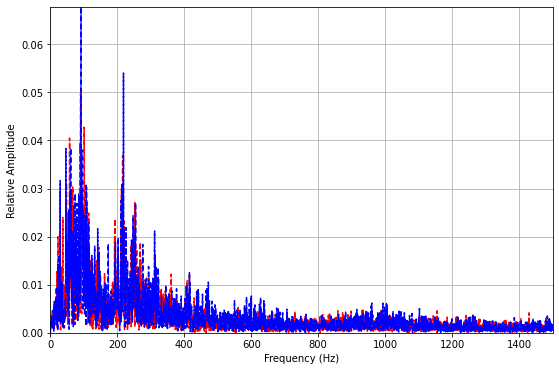

In [23]:
plot_freq_amp(2, save_fig=False)